<a href="https://colab.research.google.com/github/amansatyam18/amansatyam18/blob/main/MultiClass_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multiclass** **classification** **models**

**Import all the libraries**

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Exploring the dataset**

In [69]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv


--2021-09-05 07:02:49--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: ‘penguins.csv.3’

penguins.csv.3      100%[===================>]   6.92K  --.-KB/s    in 0s      

2021-09-05 07:02:49 (61.7 MB/s) - ‘penguins.csv.3’ saved [7086/7086]



In [70]:
df_penguins=pd.read_csv("penguins.csv")
df_penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [71]:
# Count the number of null values for each column
df_penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [72]:
# Show rows containing nulls
df_penguins[df_penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [73]:
df_penguins=df_penguins.dropna()
df_penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

In [74]:
df_penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


In [146]:
df_penguins.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.757310
std,5.459584,1.974793,14.061714,801.954536,0.763648
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


In [148]:
#Correlation btwn all the features
df_penguins.corr()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
CulmenLength,1.000000,-0.235053,0.656181,0.595110,0.779857
CulmenDepth,-0.235053,1.000000,-0.583851,-0.471916,-0.183090
FlipperLength,0.656181,-0.583851,1.000000,0.871202,0.357472
BodyMass,0.595110,-0.471916,0.871202,1.000000,0.209717
Species,0.779857,-0.183090,0.357472,0.209717,1.000000


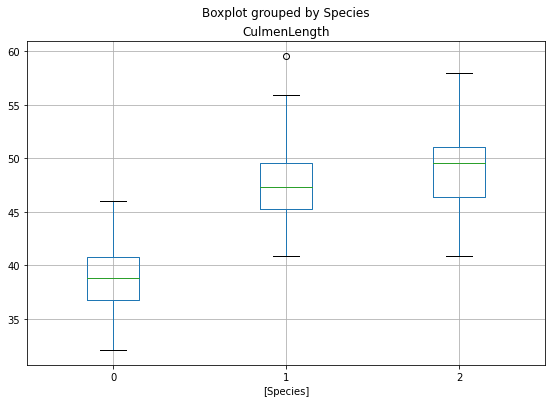

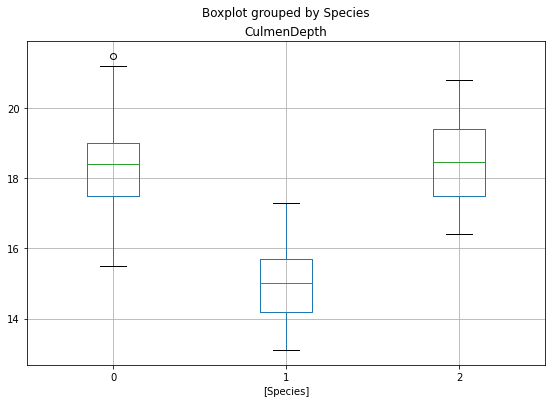

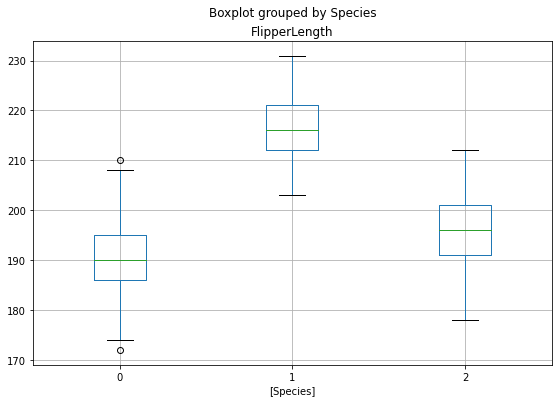

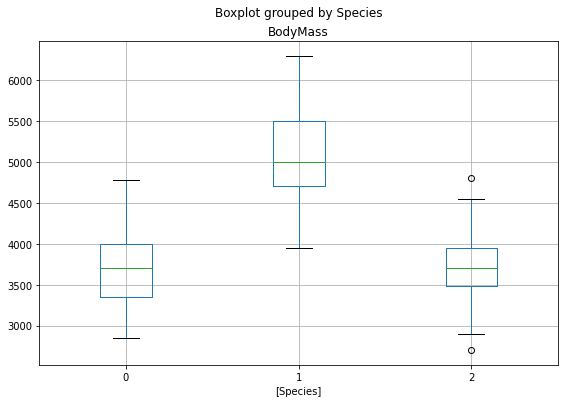

In [158]:
#dividing the dataset into features and labels to visualize the plots
penguins_feature=['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
labels=['Species']

for col in penguins_feature:
  df_penguins.boxplot(column=col,by=labels,figsize=(9,6))
  plt.title(col)

plt.show()

From the box plots, it looks like species 0 and 2 (Adelie and Chinstrap) have similar data profiles for culmen depth, flipper length, and body mass, but Chinstraps tend to have longer culmens. Species 1 (Gentoo) tends to have fairly clearly differentiated features from the others; which should help us train a good classification model.

Data Preperation

In [88]:
from sklearn.model_selection import train_test_split

features=['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
labels=['Species']
X=df_penguins[features].values
y=df_penguins[labels].values
              
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print("Training data cases:%d \n Testing data cases:%d"%(X_train.shape[0],X_test.shape[0]))

Training data cases:239 
 Testing data cases:103


Train and evaluate a mutiple classifier

In [95]:
from sklearn.linear_model import LogisticRegression
reg=0.01

model=LogisticRegression(C=1/reg,solver='liblinear')
model.fit(X_train,y_train)
print(model)

predictions=model.predict(X_test)
print("Actual labels:",y_test)
print("Predicted labels:",predictions)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Actual labels: [[0]
 [2]
 [0]
 [2]
 [0]
 [2]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [2]
 [0]
 [2]
 [0]
 [2]
 [1]
 [0]
 [0]
 [1]
 [2]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [2]
 [0]
 [1]
 [2]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [2]
 [1]
 [1]
 [1]
 [0]]
Predicted labels: [0 2 0 2 0 2 1 0 1 0 0 1 1 0 0 1 1 1 2 0 2 0 2 1 0 0 1 2 1 1 0 0 0 1 1 0 2
 1 2 0 0 0 0 1 0 0 2 1 1 2 0 0 0 0 2 0 1 0 0

Checking of Accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        18

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



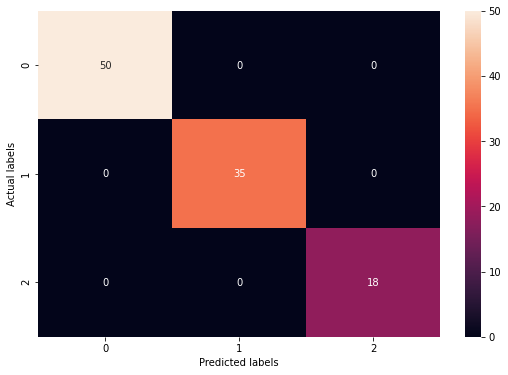

In [139]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

cm=confusion_matrix(y_test,predictions)
fig=plt.figure(figsize=(9,6))
sns.heatmap(data=cm,annot=True)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")

plt.show()


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test,predictions))
print("Overall Precision:",precision_score(y_test,predictions, average='macro'))
print("Overall Recall:",recall_score(y_test,predictions, average='macro'))

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


Preprocessing of data in pipeline

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

#Define preprocessing for numeric features

numeric_features=[0,1,2,3]
numeric_transformer=Pipeline(steps=[('scaler',StandardScaler())])

preprocessor=ColumnTransformer(transformers=[('preprocess',numeric_transformer,numeric_features)])

pipeline=Pipeline(steps=[('preprocessor',preprocessor),('regressor',SVC(probability=True))])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        18

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



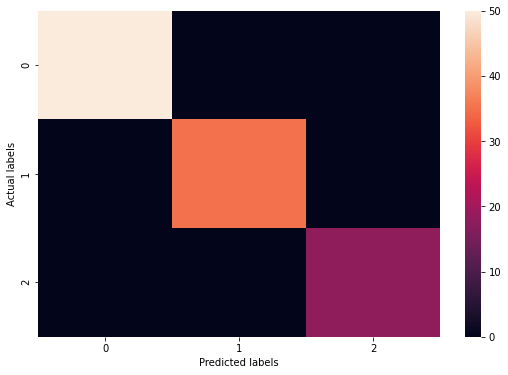

In [143]:
print(classification_report(y_test,predictions))

cm=confusion_matrix(y_test,predictions)
fig=plt.figure(figsize=(9,6))
sns.heatmap(data=cm,annot=None)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

In [115]:
df_penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


Deploying of the Data Model

In [134]:
import joblib
filename='./penguin_model.pkl'
joblib.dump(model,filename)

model=joblib.load(filename)

penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']

new_input=np.array([[58.7,16.9,217,4291],[37.6,19.2,193,3492]])
print("New Input:",new_input)
new_output=model.predict(new_input)
for result in new_output:
  print('New Output :',result,'('+ penguin_classes[result] +')')

New Input: [[  58.7   16.9  217.  4291. ]
 [  37.6   19.2  193.  3492. ]]
New Output : 2 (Chinstrap)
New Output : 0 (Adelie)


**SUMMARY**

I used Logistic Regression and SVM classifier for classification of the species. i also used heatmap and classification report to look into the accuracy and then improving it. This model predicts the outcome with 100% accuracy.